<a href="https://colab.research.google.com/github/Wilkingc/Forecasting-Post-Fire-Debris-Flow/blob/main/15mLogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

## Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url =  ('/content/drive/MyDrive/Flood Capstone/USGS_Logistic_Regression_DS.xlsx')
data = pd.read_excel(url, sheet_name = 1)

## Read in the data



Notice that the data set does not have column names.  So, we will create our own and include them when we create the data frame.


In [ ]:
clime = data.copy()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
clime.head()

,Fire Name,Year,Fire_ID,Fire_SegID,Database,State,UTM_Zone,UTM_X,UTM_Y,Response,StormDate,GaugeDist_m,StormStart,StormEnd,StormDur_H,StormAccum_mm,StormAvgI_mm/h,Peak_I15_mm/h,Peak_I30_mm/h,Peak_I60_mm/h,ContributingArea_km2,PropHM23,dNBR/1000,KF,Acc015_mm,Acc030_mm,Acc060_mm
0,Buckweed,2007,bck,bck_1035,Training,CA,11,368133.5165,3823231.989,0,2008-01-22 00:00:00,1998.67,2008-01-21 16:27:00,2008-01-22 19:20:00,26.883,5.4,0.20,3.2,2.0,2.0,0.378767,0.217933,0.297853,0.250000,0.8,1.0,2.0
1,Buckweed,2007,bck,bck_1090,Training,CA,11,367871.0165,3822984.489,0,2008-01-22 00:00:00,2368.93,2008-01-21 16:27:00,2008-01-22 19:20:00,26.883,5.4,0.20,3.2,2.0,2.0,0.689615,0.061249,0.224896,0.250000,0.8,1.0,2.0
2,Buckweed,2007,bck,bck_1570,Training,CA,11,367503.5165,3821741.989,0,2008-01-22 00:00:00,3956.74,2008-01-21 16:27:00,2008-01-22 19:20:00,26.883,5.4,0.20,3.2,2.0,2.0,2.757312,0.042968,0.065537,0.248541,0.8,1.0,2.0
3,Buckweed,2007,bck,bck_235,Training,CA,11,371108.5165,3824991.989,0,2008-01-22 00:00:00,1734.72,2008-01-21 15:47:00,2008-01-22 19:39:00,27.883,3.0,0.11,1.6,1.2,0.8,0.613415,0.092164,0.141711,0.250000,0.4,0.6,0.8
4,Buckweed,2007,bck,bck_363,Training,CA,11,370763.5165,3824576.989,0,2008-01-22 00:00:00,1801.04,2008-01-21 15:47:00,2008-01-22 19:39:00,27.883,3.0,0.11,1.6,1.2,0.8,0.538875,0.058353,0.210158,0.250000,0.4,0.6,0.8


In [ ]:
clime.shape

(1550, 27)

In [ ]:
clime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fire Name             1550 non-null   object        
 1   Year                  1550 non-null   int64         
 2   Fire_ID               1550 non-null   object        
 3   Fire_SegID            1550 non-null   object        
 4   Database              1550 non-null   object        
 5   State                 1550 non-null   object        
 6   UTM_Zone              1550 non-null   int64         
 7   UTM_X                 1550 non-null   float64       
 8   UTM_Y                 1550 non-null   float64       
 9   Response              1550 non-null   int64         
 10  StormDate             1550 non-null   object        
 11  GaugeDist_m           1550 non-null   float64       
 12  StormStart            1390 non-null   datetime64[ns]
 13  StormEnd          

In [ ]:
clime = clime.drop(['Fire Name','Fire_ID','Fire_SegID','Database','State','StormDate','StormStart','StormEnd','UTM_X','UTM_Y','Peak_I30_mm/h','Peak_I60_mm/h','Acc030_mm','Acc060_mm'], axis = 1 )

In [ ]:
clime.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1550.0,2006.933548,3.466538,2000.000000,2003.000000,2009.000000,2009.000000,2012.000000
UTM_Zone,1550.0,11.616129,0.836003,11.000000,11.000000,11.000000,12.000000,13.000000
Response,1550.0,0.215484,0.411290,0.000000,0.000000,0.000000,0.000000,1.000000
GaugeDist_m,1550.0,1958.996196,1071.810282,27.843965,1037.460000,1913.675000,2811.027500,3999.300000
StormDur_H,1550.0,18.446009,18.507975,0.000000,2.000000,14.300000,27.137500,65.000000
StormAccum_mm,1550.0,34.971515,38.374910,0.000000,8.380000,22.000000,51.200000,222.250000
StormAvgI_mm/h,1550.0,4.877449,9.364335,0.000000,0.615758,1.960000,4.237463,58.670143
Peak_I15_mm/h,1320.0,23.821315,21.259860,1.600000,10.400000,16.800000,27.574000,112.000000
ContributingArea_km2,1550.0,1.047743,1.537803,0.020100,0.108485,0.435986,1.308229,7.888105
PropHM23,1550.0,0.478713,0.276017,0.000000,0.233447,0.523288,0.692406,0.989526


In [ ]:
clime['Response'].value_counts( dropna = False)


,count
Response,
0,1216
1,334


In [ ]:
clime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1550 non-null   int64  
 1   UTM_Zone              1550 non-null   int64  
 2   Response              1550 non-null   int64  
 3   GaugeDist_m           1550 non-null   float64
 4   StormDur_H            1550 non-null   float64
 5   StormAccum_mm         1550 non-null   float64
 6   StormAvgI_mm/h        1550 non-null   float64
 7   Peak_I15_mm/h         1320 non-null   float64
 8   ContributingArea_km2  1550 non-null   float64
 9   PropHM23              1550 non-null   float64
 10  dNBR/1000             1473 non-null   float64
 11  KF                    1550 non-null   float64
 12  Acc015_mm             1320 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 157.5 KB


In [ ]:
def fill_nulls_with_mean(df):
  """
  Replaces null values in a DataFrame with the mean of each column.

  Args:
    df: The pandas DataFrame to process.

  Returns:
    A DataFrame with null values replaced by column means.
  """

  for column in df.columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

  return df


In [ ]:
pima = fill_nulls_with_mean(clime)

<ipython-input-16-22b674667130>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(column_mean, inplace=True)


In [ ]:
clime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1550 non-null   int64  
 1   UTM_Zone              1550 non-null   int64  
 2   Response              1550 non-null   int64  
 3   GaugeDist_m           1550 non-null   float64
 4   StormDur_H            1550 non-null   float64
 5   StormAccum_mm         1550 non-null   float64
 6   StormAvgI_mm/h        1550 non-null   float64
 7   Peak_I15_mm/h         1550 non-null   float64
 8   ContributingArea_km2  1550 non-null   float64
 9   PropHM23              1550 non-null   float64
 10  dNBR/1000             1550 non-null   float64
 11  KF                    1550 non-null   float64
 12  Acc015_mm             1550 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 157.5 KB


In [ ]:
X = clime.drop('Response',axis=1).copy()
y = clime['Response'].copy()

## EDA

### Correlation matrix plot

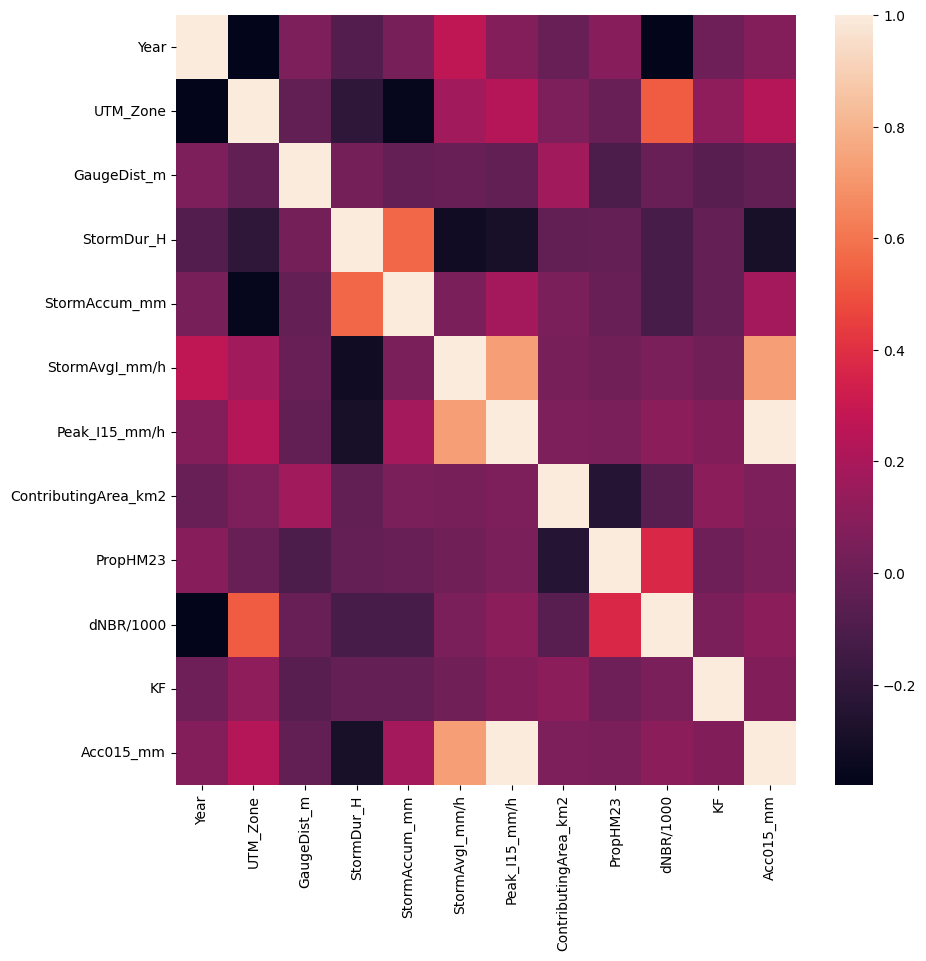

In [ ]:
# Checking correlations between predictors
plt.figure(figsize=(10,10))
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=False)
plt.show()


### Feature distributions

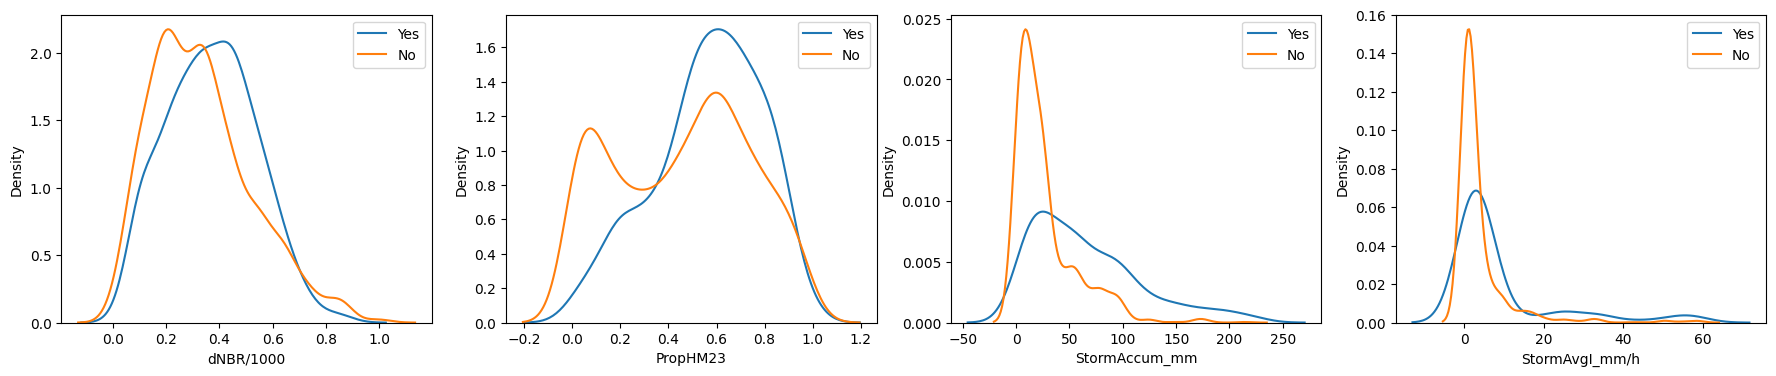

In [ ]:
# Look at the distribution of a few predictors for different labels
predictors = ['dNBR/1000', 'PropHM23', 'StormAccum_mm', 'StormAvgI_mm/h']

fig, axes = plt.subplots(1,4, figsize= (22,4))
for i,pred in enumerate(predictors):
  sns.kdeplot(pima[pred][y==1], label = 'Yes', ax = axes[i])
  sns.kdeplot(pima[pred][y==0], label = 'No', ax = axes[i])
  axes[i].legend()
plt.show()


## Fit Logistic Model

In [ ]:
from sklearn.preprocessing import StandardScaler

### Cross validation

In [ ]:
numLoops = 100
predict_accuracy = np.zeros(numLoops)
predict_f1 = np.zeros(numLoops)

for idx in range(numLoops):
  # Train/test split
  X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2 )

  # Create a new scaler for each iteration
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Create model
  logreg = LogisticRegression( max_iter=20000 )

  # Fit ( train ) model
  logreg.fit(X_train_scaled, y_train)

  # Predict
  y_pred = logreg.predict( X_test_scaled )

  # Calculate and record performance metrics
  predict_accuracy[idx] = metrics.accuracy_score(y_test,y_pred)
  predict_f1[idx] = metrics.f1_score(y_test,y_pred)

print(f"Mean Accuracy: {predict_accuracy.mean()*100:.1f}%")
print(f"F1 Score: {predict_f1.mean()*100:.1f}%")

Mean Accuracy: 83.5%
F1 Score: 51.0%


### Confusion matrix

<Figure size 800x800 with 0 Axes>

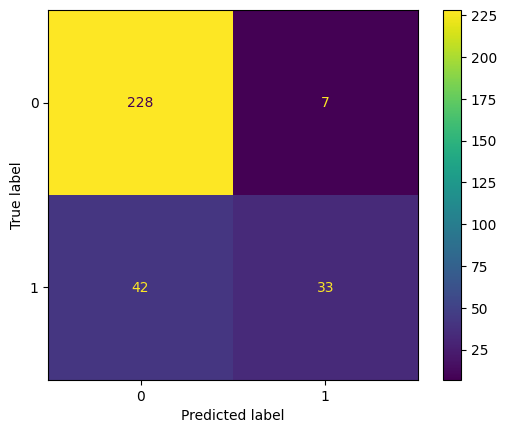

In [ ]:
# Let's look at the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

We are often predicting that someone does not have diabetes even if they do. What can we do to combat this?

### Balance classes

In [ ]:
# Let's balance our classes
clime_balanced = clime.groupby('Response').sample(n = 334, replace = False)

In [ ]:
clime_balanced['Response'].value_counts( dropna = False)

,count
Response,
0,334
1,334


In [ ]:
X = clime_balanced.drop('Response',axis=1).copy()
y = clime_balanced['Response'].copy()

### Cross validation

In [ ]:
numLoops = 100
predict_accuracy = np.zeros(numLoops)
predict_f1 = np.zeros(numLoops)

for idx in range(numLoops):
  # Train/test split
  X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2 )

  # Create a new scaler for each iteration
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Create model
  logreg = LogisticRegression( max_iter=20000 )

  # Fit ( train ) model
  logreg.fit(X_train_scaled, y_train)

  # Predict
  y_pred = logreg.predict( X_test_scaled )

  # Calculate and record performance metrics
  predict_accuracy[idx] = metrics.accuracy_score(y_test,y_pred)
  predict_f1[idx] = metrics.f1_score(y_test,y_pred)

print(f"Mean Accuracy: {predict_accuracy.mean()*100:.1f}%")
print(f"F1 Score: {predict_f1.mean()*100:.1f}%")

Mean Accuracy: 73.0%
F1 Score: 71.6%


### Confusion matrix

Let's look at the confusion matrix using the last validation run


<Figure size 800x800 with 0 Axes>

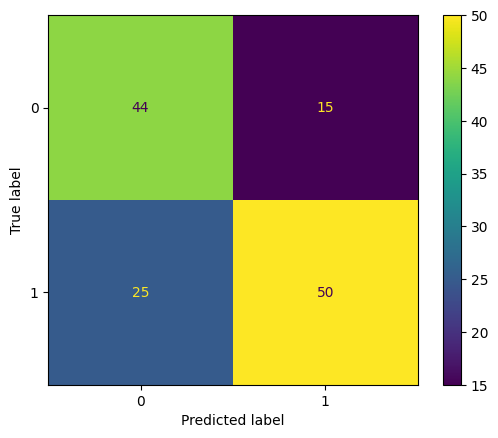

In [ ]:
cm = confusion_matrix( y_test, y_pred )
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay( confusion_matrix = cm )
disp.plot()
plt.show()


How does it make its classifications?

In [ ]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]
print(y_pred_proba[0:15]*100)

[62.85695332 68.43629436 63.48772128 30.15153499  7.38749623 25.27148248
 44.8198023  42.95832075 26.76282717 86.86058314 62.40651699 95.8439592
 39.21703627 97.48195067 52.76290815]


Pair up preditions with probabilities.  The default threshold is 50%.

In [ ]:
sorted( zip( y_pred, y_pred_proba[0:15]*100))


[(0, 7.387496229439828),
 (0, 25.271482481668322),
 (0, 26.762827169958207),
 (0, 30.151534985218802),
 (0, 39.21703626962233),
 (0, 42.958320748726706),
 (0, 44.8198023032794),
 (1, 52.76290814826942),
 (1, 62.40651698978405),
 (1, 62.85695331676947),
 (1, 63.48772127992696),
 (1, 68.43629436408649),
 (1, 86.86058314471876),
 (1, 95.84395919980014),
 (1, 97.48195067137698)]

## ROC-AUC



A receiver operating characteristic ( ROC ) and area under the curve ( AUC ) plot illustrates the performance of a binary classifier model at varying threshold values.  It also enables us to pick an optimal threshold for classification.






### Compute ROC curve and AUC


In [ ]:
fpr, tpr, thresholds = roc_curve( y_test, y_pred_proba )
roc_auc = auc(fpr, tpr)


In [ ]:
len(y_test), len(y_pred_proba)

(134, 134)

In [ ]:
y_test.value_counts()

,count
Response,
0,77
1,57


In [ ]:
roc_auc

0.7812429378531074

### Plot ROC curve


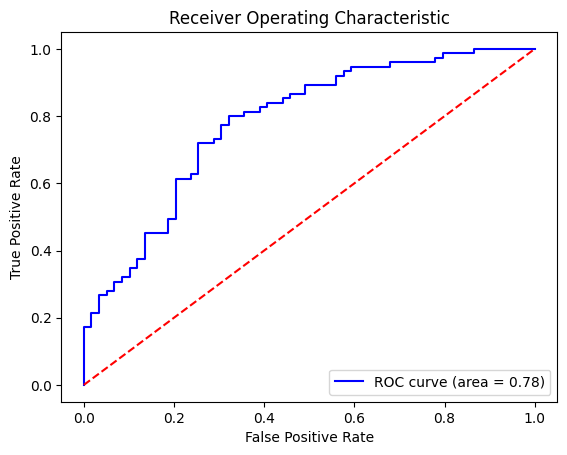

In [ ]:
plt.figure()
plt.plot(
  fpr,
  tpr,
  color = 'blue',
  label = f'ROC curve (area = {roc_auc:.2f})',
)
plt.plot(
  [0, 1],
  [0, 1],
  color='red',
  linestyle='--',
)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)  # Point closest to top-left corner
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold: {optimal_threshold}')


Optimal threshold: 0.3874404705003525


### Calculate predictions usin ROC-AUC threshold


In [ ]:
y_pred = ( y_pred_proba >= optimal_threshold ).astype(int)
# y_pred = ( y_pred_proba >= .4 ).astype(int)

y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1])

### Confusion matrix

<Figure size 800x800 with 0 Axes>

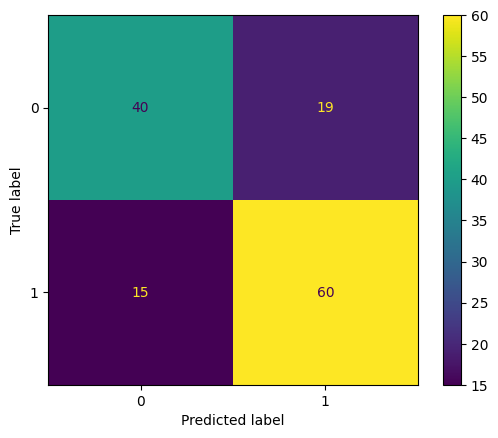

In [ ]:
# Let's look at the confusion matrix
cm = confusion_matrix( y_test, y_pred )
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay( confusion_matrix = cm )
disp.plot()
plt.show()


### Calculate performance metrics

In [ ]:
predict_accuracy = metrics.accuracy_score( y_test, y_pred )
predict_f1 = metrics.f1_score( y_test, y_pred )

print(f"Mean Accuracy: {predict_accuracy*100:.1f}%")
print(f"F1 Score: {predict_f1*100:.1f}%")

Mean Accuracy: 74.6%
F1 Score: 77.9%


## References

- [ROC-AUC]( https://en.wikipedia.org/wiki/Receiver_operating_characteristic )